In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#from keras.backend.tensorflow_backend import set_session

from tensorflow import keras
import sys, os, time, warnings
import pandas as pd


2025-02-25 19:00:51.912526: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-25 19:00:52.234848: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-25 19:00:52.236859: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-25 19:00:53.377771: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
image_folder = '/home/aishanya/Desktop/Img_Caption/archive/Images'
dir_captions = '/home/aishanya/Desktop/Img_Caption/archive/captions.txt'

In [3]:
jpgs = os.listdir(image_folder)

In [4]:
print("elements in jps : {}".format(len(jpgs)))

elements in jps : 8091


In [5]:
df = pd.read_csv(dir_captions, sep = ',')
print(len(df))
print(df.head(3))

40455
                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  


text preprocessing


In [6]:
def remove_single_character_ward(word_list):
    return [word for word in word_list if len(word)>1]

In [7]:
#making cleaned word dataset
df['cleaned'] = df['caption'].apply(lambda caption : ['<start>'] + [word.lower() if word.isalpha() else ' ' for word in caption.split(" ")] + ["<end>"])

In [8]:
df

,image,caption,cleaned
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,"[<start>, a, child, in, a, pink, dress, is, cl..."
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,"[<start>, a, girl, going, into, a, wooden, bui..."
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,"[<start>, a, little, girl, climbing, into, a, ..."
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,"[<start>, a, little, girl, climbing, the, stai..."
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,"[<start>, a, little, girl, in, a, pink, dress,..."
...,...,...,...
40450,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face,"[<start>, a, man, in, a, pink, shirt, climbs, ..."
40451,997722733_0cb5439472.jpg,A man is rock climbing high in the air .,"[<start>, a, man, is, rock, climbing, high, in..."
40452,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...,"[<start>, a, person, in, a, red, shirt, climbi..."
40453,997722733_0cb5439472.jpg,A rock climber in a red shirt .,"[<start>, a, rock, climber, in, a, red, shirt,..."


In [9]:
df['cleaned'] = df['cleaned'].apply(lambda x : remove_single_character_ward(x) )

In [10]:
df

,image,caption,cleaned
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,"[<start>, child, in, pink, dress, is, climbing..."
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,"[<start>, girl, going, into, wooden, building,..."
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,"[<start>, little, girl, climbing, into, wooden..."
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,"[<start>, little, girl, climbing, the, stairs,..."
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,"[<start>, little, girl, in, pink, dress, going..."
...,...,...,...
40450,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face,"[<start>, man, in, pink, shirt, climbs, rock, ..."
40451,997722733_0cb5439472.jpg,A man is rock climbing high in the air .,"[<start>, man, is, rock, climbing, high, in, t..."
40452,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...,"[<start>, person, in, red, shirt, climbing, up..."
40453,997722733_0cb5439472.jpg,A rock climber in a red shirt .,"[<start>, rock, climber, in, red, shirt, <end>]"


In [11]:
df['len_of_sequence'] = df['cleaned'].apply(lambda x : len(x))

In [12]:
df

,image,caption,cleaned,len_of_sequence
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,"[<start>, child, in, pink, dress, is, climbing...",16
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,"[<start>, girl, going, into, wooden, building,...",7
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,"[<start>, little, girl, climbing, into, wooden...",8
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,"[<start>, little, girl, climbing, the, stairs,...",10
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,"[<start>, little, girl, in, pink, dress, going...",11
...,...,...,...,...
40450,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face,"[<start>, man, in, pink, shirt, climbs, rock, ...",9
40451,997722733_0cb5439472.jpg,A man is rock climbing high in the air .,"[<start>, man, is, rock, climbing, high, in, t...",10
40452,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...,"[<start>, person, in, red, shirt, climbing, up...",14
40453,997722733_0cb5439472.jpg,A rock climber in a red shirt .,"[<start>, rock, climber, in, red, shirt, <end>]",7


In [13]:
max_s= df['len_of_sequence'].max()
max_s

33

In [14]:
df.drop(['len_of_sequence'], axis = 1, inplace=True)

In [15]:
df['cleaned'] = df['cleaned'].apply(lambda caption : caption + ['<pad>']*(max_s-len(caption)) )

In [16]:
display(df.head(2))

,image,caption,cleaned
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,"[<start>, child, in, pink, dress, is, climbing..."
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,"[<start>, girl, going, into, wooden, building,..."


In [17]:
list_word = df['cleaned'].apply(lambda x : " ".join(x)).str.cat(sep = ' ').split(' ')

In [18]:
list_word

['<start>',
 'child',
 'in',
 'pink',
 'dress',
 'is',
 'climbing',
 'up',
 'set',
 'of',
 'stairs',
 'in',
 'an',
 'entry',
 'way',
 '<end>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<start>',
 'girl',
 'going',
 'into',
 'wooden',
 'building',
 '<end>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<start>',
 'little',
 'girl',
 'climbing',
 'into',
 'wooden',
 'playhouse',
 '<end>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<start>',
 '

In [19]:
from collections import Counter
word_dict = Counter(list_word)
word_dict

Counter({'<start>': 40455,
         'child': 1545,
         'in': 18974,
         'pink': 735,
         'dress': 348,
         'is': 9345,
         'climbing': 502,
         'up': 1260,
         'set': 108,
         'of': 6713,
         'stairs': 109,
         'an': 2432,
         'entry': 1,
         'way': 50,
         '<end>': 40455,
         '<pad>': 882240,
         'girl': 3328,
         'going': 149,
         'into': 1074,
         'wooden': 284,
         'building': 510,
         'little': 1768,
         'playhouse': 6,
         'the': 18418,
         'to': 3173,
         'her': 1178,
         'cabin': 4,
         'black': 3832,
         'dog': 8136,
         'and': 8851,
         'spotted': 37,
         'are': 3504,
         'fighting': 132,
         'playing': 2008,
         'with': 7765,
         'each': 430,
         'other': 773,
         'on': 10743,
         'road': 388,
         'white': 3940,
         'brown': 2563,
         'spots': 29,
         'staring': 57,
       

In [20]:
word_dict = sorted(word_dict, key=word_dict.get , reverse= True)

In [21]:
word_dict

['<pad>',
 '<start>',
 '<end>',
 'in',
 'the',
 'on',
 'is',
 'and',
 'dog',
 'with',
 'man',
 'of',
 'two',
 'white',
 'black',
 'boy',
 'are',
 'woman',
 'girl',
 'to',
 'wearing',
 'at',
 'people',
 'water',
 'red',
 'young',
 'brown',
 'an',
 'his',
 'blue',
 'dogs',
 'running',
 'through',
 'playing',
 'while',
 'down',
 'shirt',
 'standing',
 'ball',
 'little',
 'grass',
 'child',
 'person',
 'snow',
 'jumping',
 'over',
 'front',
 'three',
 'sitting',
 'holding',
 'field',
 'small',
 'up',
 'by',
 'large',
 'green',
 'group',
 'one',
 'yellow',
 'her',
 'walking',
 'children',
 'men',
 'into',
 'air',
 'beach',
 'near',
 'mouth',
 'jumps',
 'another',
 'for',
 'street',
 'runs',
 'its',
 'from',
 'riding',
 'stands',
 'as',
 'bike',
 'girls',
 'outside',
 'other',
 'out',
 'rock',
 'next',
 'play',
 'off',
 'looking',
 'orange',
 'pink',
 'player',
 'their',
 'camera',
 'pool',
 'hat',
 'jacket',
 'boys',
 'women',
 'around',
 'behind',
 'some',
 'background',
 'dirt',
 'toy',
 

In [22]:
import pickle
with open('/home/aishanya/Desktop/Img_Caption/archive/vocab.txt' , 'wb') as f:
    pickle.dump(word_dict ,f)

In [23]:
with open('/home/aishanya/Desktop/Img_Caption/archive/vocab.txt' , 'rb' ) as f:
    word_dict = pickle.load(f)

In [24]:
word_dict[:10]

['<pad>', '<start>', '<end>', 'in', 'the', 'on', 'is', 'and', 'dog', 'with']

In [25]:
vocab_size = len(word_dict)

In [26]:
index_to_word = {index : word for index , word in enumerate(word_dict)}
word_to_index = {word : index for index , word in enumerate(word_dict)}
print(index_to_word , word_to_index)
print(len(index_to_word) ,len( word_to_index))


{0: '<pad>', 1: '<start>', 2: '<end>', 3: 'in', 4: 'the', 5: 'on', 6: 'is', 7: 'and', 8: 'dog', 9: 'with', 10: 'man', 11: 'of', 12: 'two', 13: 'white', 14: 'black', 15: 'boy', 16: 'are', 17: 'woman', 18: 'girl', 19: 'to', 20: 'wearing', 21: 'at', 22: 'people', 23: 'water', 24: 'red', 25: 'young', 26: 'brown', 27: 'an', 28: 'his', 29: 'blue', 30: 'dogs', 31: 'running', 32: 'through', 33: 'playing', 34: 'while', 35: 'down', 36: 'shirt', 37: 'standing', 38: 'ball', 39: 'little', 40: 'grass', 41: 'child', 42: 'person', 43: 'snow', 44: 'jumping', 45: 'over', 46: 'front', 47: 'three', 48: 'sitting', 49: 'holding', 50: 'field', 51: 'small', 52: 'up', 53: 'by', 54: 'large', 55: 'green', 56: 'group', 57: 'one', 58: 'yellow', 59: 'her', 60: 'walking', 61: 'children', 62: 'men', 63: 'into', 64: 'air', 65: 'beach', 66: 'near', 67: 'mouth', 68: 'jumps', 69: 'another', 70: 'for', 71: 'street', 72: 'runs', 73: 'its', 74: 'from', 75: 'riding', 76: 'stands', 77: 'as', 78: 'bike', 79: 'girls', 80: 'outs

In [27]:
df['text_seq'] = df['cleaned'].apply(lambda caption : [word_to_index[word] for word in caption])

In [28]:
df

,image,caption,cleaned,text_seq
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,"[<start>, child, in, pink, dress, is, climbing...","[1, 41, 3, 89, 168, 6, 118, 52, 392, 11, 389, ..."
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,"[<start>, girl, going, into, wooden, building,...","[1, 18, 311, 63, 192, 116, 2, 0, 0, 0, 0, 0, 0..."
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,"[<start>, little, girl, climbing, into, wooden...","[1, 39, 18, 118, 63, 192, 2402, 2, 0, 0, 0, 0,..."
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,"[<start>, little, girl, climbing, the, stairs,...","[1, 39, 18, 118, 4, 389, 19, 59, 2402, 2, 0, 0..."
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,"[<start>, little, girl, in, pink, dress, going...","[1, 39, 18, 3, 89, 168, 311, 63, 192, 2949, 2,..."
...,...,...,...,...
40450,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face,"[<start>, man, in, pink, shirt, climbs, rock, ...","[1, 10, 3, 89, 36, 250, 83, 122, 2, 0, 0, 0, 0..."
40451,997722733_0cb5439472.jpg,A man is rock climbing high in the air .,"[<start>, man, is, rock, climbing, high, in, t...","[1, 10, 6, 83, 118, 194, 3, 4, 64, 2, 0, 0, 0,..."
40452,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...,"[<start>, person, in, red, shirt, climbing, up...","[1, 42, 3, 24, 36, 118, 52, 83, 122, 184, 3, 3..."
40453,997722733_0cb5439472.jpg,A rock climber in a red shirt .,"[<start>, rock, climber, in, red, shirt, <end>...","[1, 83, 355, 3, 24, 36, 2, 0, 0, 0, 0, 0, 0, 0..."


In [29]:
df = df.sort_values(by='image')
train = df.iloc[:int(0.9*len(df))]

In [30]:
valid = df.iloc[int(0.9*len(df)):]

In [31]:
train['image'].nunique()

7282

In [32]:
import torch
import torchvision
from torchvision import transforms
from torch.utils import data
from torch.utils.data import DataLoader ,Dataset
import torch.nn as nn

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [34]:
print(device)

cuda


In [35]:
from PIL import Image

In [36]:
class CustomData():
    def __init__(self , data):
      self.data = data
      self.scaler = transforms.Resize([224,224])
      self.normalize = transforms.Normalize(mean = [0.485 , 0.456 , 0.406],std = [0.229 , 0.224,0.225]) # Average pixel intensity in RGB channels.,Standard deviation of pixel intensities.
      self.to_tensor= transforms.ToTensor()#cale data to a standard range (like -1 to 1)

    def __len__(self):
      return len(self.data)
    def __getitem__(self,idx):
       image_name = self.data.iloc[idx]['image']
       img_loc = '/home/aishanya/Desktop/Img_Caption/archive/Images/'+str(image_name)
       img = Image.open(img_loc)
       tensor_img = self.normalize(self.to_tensor(self.scaler(img)))
       return image_name , tensor_img

In [37]:
unique_train_img = train[['image']].drop_duplicates()
unique_valid_img = valid[['image']].drop_duplicates()


In [38]:
train_ds = CustomData(unique_train_img)
train_dl = DataLoader(train_ds , batch_size=1 , shuffle=True)

In [39]:
valid_ds = CustomData(unique_valid_img)
valid_dl = DataLoader(valid_ds , batch_size= 1 , shuffle=False)

In [40]:
from torchvision import models

In [41]:
resnet10 = models.resnet18(pretrained=True)
resnet10 = torch.nn.Sequential(*list(resnet10.children())[:-1])  # Remove the FC layer
resnet10 = resnet10.to(device)  # Move model to GPU or CPU
resnet10.eval()

/home/aishanya/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/aishanya/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [42]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())


2.4.1+cu121
12.1
90100


In [43]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [44]:
list(resnet10._modules)

['0', '1', '2', '3', '4', '5', '6', '7', '8']

In [45]:
features = {}

# Process images
for jpg in jpgs:
    img_path = os.path.join(image_folder, jpg)
    img = Image.open(img_path).convert("RGB")
    img = transform(img).unsqueeze(0).to(device)  # Add batch dimension

    with torch.no_grad():
        x = resnet10(img).squeeze().detach().cpu().numpy()  # Extract features

    features[jpg] = x.flatten()  # Flatten the feature map

# Save features
with open('image_features.pkl', 'wb') as f:
    pickle.dump(features, f)

print("Feature extraction complete. Features saved to image_features.pkl")

Feature extraction complete. Features saved to image_features.pkl


In [47]:
from tqdm import tqdm
from torchvision import models

In [50]:
with torch.no_grad():
    x = resnet10(img).squeeze().detach().cpu().numpy()  # Extract features
if x is None or x.size == 0:  # Check if extraction failed
    print(f"❌ Warning: No valid features for image {jpg}")
else:
    print(f"✅ Extracted features for {jpg}: {x.shape}")
features[jpg] = x.flatten() if x is not None else None  # Flatten & store


✅ Extracted features for 2414352262_005ae90407.jpg: (512,)


In [51]:
import random


In [52]:
class FlickerDataResnet():
    def __init__(self, data, pkl_file):
        self.data = data
        self.encodedImg = pd.read_pickle(pkl_file)

        # Debugging: Check keys
        none_count = sum(1 for v in self.encodedImg.values() if v is None)
        print(f"Total None values in encodedImg: {none_count}")
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        caption_seq = self.data.iloc[idx]['text_seq']
        target_seq = caption_seq[1:] + [0]
        image_name = self.data.iloc[idx]['image']

        # Debugging: Check if image_name exists
        if image_name not in self.encodedImg:
            raise ValueError(f"❌ Error: No valid embedding found for image: {image_name}")

        image_tensor = self.encodedImg[image_name]

        # Debugging: Check if image_tensor is None
        if len(image_tensor.shape) == 3:  # If [C, H, W], permute to [H, W, C]
            image_tensor = image_tensor.permute(1, 2, 0)

        return torch.tensor(caption_seq), torch.tensor(target_seq), image_tensor


In [53]:
train_ds = FlickerDataResnet(train , '/home/aishanya/Desktop/Img_Caption/archive/image_features.pkl')
train_dl = DataLoader(train_ds , batch_size=32 , shuffle= True)

Total None values in encodedImg: 0


In [54]:
valid_ds = FlickerDataResnet(valid , '/home/aishanya/Desktop/Img_Caption/archive/image_features.pkl')
valid_dl = DataLoader(valid_ds , batch_size=32, shuffle= True)

Total None values in encodedImg: 0


In [55]:
import pandas as pd

encodedImg = pd.read_pickle("/home/aishanya/Desktop/Img_Caption/archive/image_features.pkl")

# Print total entries
print("Total images in encodedImg:", len(encodedImg))

# Count how many values are None
none_count = sum(1 for v in encodedImg.values() if v is None)
print(f"Total None values in encodedImg: {none_count}")

# Print a few sample entries
for key, value in list(encodedImg.items())[:5]:
    print(f"{key}: {'None' if value is None else 'Valid Tensor'}")


Total images in encodedImg: 8091
Total None values in encodedImg: 0
1478606153_a7163bf899.jpg: Valid Tensor
2460477085_088e25f857.jpg: Valid Tensor
3562302012_0cbcd01ff9.jpg: Valid Tensor
3325129757_7a1979ac11.jpg: Valid Tensor
3437693401_202afef348.jpg: Valid Tensor


In [56]:
train_ds.__getitem__(0)

(tensor([   1,   41,    3,   89,  168,    6,  118,   52,  392,   11,  389,    3,
           27, 5075,  690,    2,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0]),
 tensor([  41,    3,   89,  168,    6,  118,   52,  392,   11,  389,    3,   27,
         5075,  690,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0]),
 array([3.83446246e-01, 1.18877351e+00, 2.03431416e+00, 6.49797857e-01,
        1.03712058e+00, 5.07586956e-01, 2.02901554e+00, 1.46540093e+00,
        8.85233656e-02, 8.82426202e-01, 4.35869992e-01, 8.86204302e-01,
        7.20780194e-02, 1.22839582e+00, 1.08517909e+00, 6.14407301e-01,
        1.55073357e+00, 1.38634467e+00, 1.56457293e+00, 1.24284792e+00,
        1.85177362e+00, 2.45114279e+00, 2.62795806e-01, 6.49968088e-01,
        1.56670797e+00, 3.04965138e-01, 1.64010930e+00, 1.14319873e+00,
        3.04944426e-01, 1.46452606e-01, 6.

In [57]:
import math
import torch

class PositionalEncoding(nn.Module):
    def __init__(self,d_model, dropout = 0.1 , max_len= max_s):
        super(PositionalEncoding , self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len , d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0,d_model,2).float()*(-math.log(10000.0)/d_model))
        pe[:, 0::2] = torch.sin(position*div_term)
        pe[:,1::2] = torch.cos(position*div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        if self.pe.size(0) < x.size(0):
            self.pe = self.pe.repeat(x.size(0),1,1).to(device)
        self.pe = self.pe[:x.size(0),:,:]
        x = x+self.pe
        return self.dropout(x)



In [58]:
class ImageCaptionModel(nn.Module):
    def __init__(self, n_head, n_decoder_layer, vocab_size, embedding_size):
        super(ImageCaptionModel, self).__init__()
        self.pos_encoder = PositionalEncoding(embedding_size, 0.1)
        self.TransformerDecoderLayer = nn.TransformerDecoderLayer(d_model =  embedding_size, nhead = n_head)
        self.TransformerDecoder = nn.TransformerDecoder(decoder_layer = self.TransformerDecoderLayer, num_layers = n_decoder_layer)
        self.embedding_size = embedding_size
        self.embedding = nn.Embedding(vocab_size , embedding_size)
        self.last_linear_layer = nn.Linear(embedding_size, vocab_size)
        self.init_weights()

    def init_weights(self):
        initrange = 0.1
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.last_linear_layer.bias.data.zero_()
        self.last_linear_layer.weight.data.uniform_(-initrange, initrange)

    def generate_Mask(self, size, decoder_inp):
        decoder_input_mask = (torch.triu(torch.ones(size, size)) == 1).transpose(0, 1)
        decoder_input_mask = decoder_input_mask.float().masked_fill(decoder_input_mask == 0, float('-inf')).masked_fill(decoder_input_mask == 1, float(0.0))

        decoder_input_pad_mask = decoder_inp.float().masked_fill(decoder_inp == 0, float(0.0)).masked_fill(decoder_inp > 0, float(1.0))
        decoder_input_pad_mask_bool = decoder_inp == 0
        decoder_input_pad_mask_bool = decoder_input_pad_mask_bool.view(-1, decoder_input_pad_mask_bool.shape[1])

        return decoder_input_mask, decoder_input_pad_mask, decoder_input_pad_mask_bool

    def forward(self, encoded_image, decoder_inp):
        if encoded_image.dim() == 2:
            encoded_image = encoded_image.unsqueeze(1) 
        encoded_image = encoded_image.permute(1,0,2)
        

        decoder_inp_embed = self.embedding(decoder_inp)* math.sqrt(self.embedding_size)
        
        decoder_inp_embed = self.pos_encoder(decoder_inp_embed)
        decoder_inp_embed = decoder_inp_embed.permute(1,0,2)
        
        decoder_input_mask, decoder_input_pad_mask, decoder_input_pad_mask_bool = self.generate_Mask(decoder_inp.size(1), decoder_inp)
        decoder_input_mask = decoder_input_mask.to(device)
        decoder_input_pad_mask = decoder_input_pad_mask.to(device)
        decoder_input_pad_mask_bool = decoder_input_pad_mask_bool.to(device)
        

        decoder_output = self.TransformerDecoder(tgt = decoder_inp_embed, memory = encoded_image, tgt_mask = decoder_input_mask, tgt_key_padding_mask = decoder_input_pad_mask_bool)
        
        final_output = self.last_linear_layer(decoder_output)

        return final_output,  decoder_input_pad_mask

In [128]:
EPOCH = 50
model = ImageCaptionModel(16,4,vocab_size, 512).to(device)
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001)
Scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor = 0.8 , patience = 2 , verbose = True)
criterion = torch.nn.CrossEntropyLoss(reduction='none')
min_val_loss= np.inf

/home/aishanya/.local/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [129]:
for epoch in tqdm(range(EPOCH)):
    total_epoch_train_loss = 0
    total_epoch_valid_loss = 0
    total_train_words = 0
    total_valid_words = 0
    model.train()

    ### Train Loop
    for caption_seq, target_seq, image_embed in train_dl:

        optimizer.zero_grad()

        image_embed = image_embed.squeeze(1).to(device)
        caption_seq = caption_seq.to(device)
        target_seq = target_seq.to(device)

        output, padding_mask = model.forward(image_embed, caption_seq)
        output = output.permute(1, 2, 0)

        loss = criterion(output,target_seq)

        loss_masked = torch.mul(loss, padding_mask)

        final_batch_loss = torch.sum(loss_masked)/torch.sum(padding_mask)

        final_batch_loss.backward()
        optimizer.step()
        total_epoch_train_loss += torch.sum(loss_masked).detach().item()
        total_train_words += torch.sum(padding_mask)

 
    total_epoch_train_loss = total_epoch_train_loss/total_train_words
  

    ### Eval Loop
    model.eval()
    with torch.no_grad():
        for caption_seq, target_seq, image_embed in valid_dl:

            image_embed = image_embed.squeeze(1).to(device)
            caption_seq = caption_seq.to(device)
            target_seq = target_seq.to(device)

            output, padding_mask = model.forward(image_embed, caption_seq)
            output = output.permute(1, 2, 0)

            loss = criterion(output,target_seq)

            loss_masked = torch.mul(loss, padding_mask)

            total_epoch_valid_loss += torch.sum(loss_masked).detach().item()
            total_valid_words += torch.sum(padding_mask)

    total_epoch_valid_loss = total_epoch_valid_loss/total_valid_words
  
    print("Epoch -> ", epoch," Training Loss -> ", total_epoch_train_loss.item(), "Eval Loss -> ", total_epoch_valid_loss.item() )
  
    if min_val_loss > total_epoch_valid_loss:
        print("Writing Model at epoch ", epoch)
        torch.save(model, './BestModel')
        torch.save(model, './model.h5')
        min_val_loss = total_epoch_valid_loss
  
    Scheduler.step(total_epoch_valid_loss.item())

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch ->  0  Training Loss ->  4.016423225402832 Eval Loss ->  3.4458107948303223
Writing Model at epoch  0


  2%|▏         | 1/50 [01:26<1:10:19, 86.12s/it]

Epoch ->  1  Training Loss ->  3.1845223903656006 Eval Loss ->  3.2005300521850586
Writing Model at epoch  1


  4%|▍         | 2/50 [02:52<1:08:48, 86.01s/it]

Epoch ->  2  Training Loss ->  2.8742759227752686 Eval Loss ->  3.1049513816833496
Writing Model at epoch  2


  6%|▌         | 3/50 [04:18<1:07:37, 86.33s/it]

Epoch ->  3  Training Loss ->  2.650268793106079 Eval Loss ->  3.0638341903686523
Writing Model at epoch  3


  8%|▊         | 4/50 [05:46<1:06:30, 86.75s/it]

Epoch ->  4  Training Loss ->  2.4615869522094727 Eval Loss ->  3.049381732940674
Writing Model at epoch  4


 12%|█▏        | 6/50 [08:41<1:04:04, 87.38s/it]

Epoch ->  5  Training Loss ->  2.294398546218872 Eval Loss ->  3.0621025562286377


 14%|█▍        | 7/50 [10:07<1:02:15, 86.88s/it]

Epoch ->  6  Training Loss ->  2.1392383575439453 Eval Loss ->  3.0833234786987305


 16%|█▌        | 8/50 [11:34<1:00:52, 86.96s/it]

Epoch ->  7  Training Loss ->  1.9944556951522827 Eval Loss ->  3.124758243560791


 18%|█▊        | 9/50 [13:02<59:27, 87.00s/it]  

Epoch ->  8  Training Loss ->  1.8163975477218628 Eval Loss ->  3.1571295261383057


 20%|██        | 10/50 [14:28<57:57, 86.95s/it]

Epoch ->  9  Training Loss ->  1.7010849714279175 Eval Loss ->  3.2045788764953613


 22%|██▏       | 11/50 [15:55<56:27, 86.85s/it]

Epoch ->  10  Training Loss ->  1.593621015548706 Eval Loss ->  3.2402501106262207


 24%|██▍       | 12/50 [17:22<55:07, 87.04s/it]

Epoch ->  11  Training Loss ->  1.4565439224243164 Eval Loss ->  3.3003385066986084


 26%|██▌       | 13/50 [18:50<53:45, 87.16s/it]

Epoch ->  12  Training Loss ->  1.375876545906067 Eval Loss ->  3.3510210514068604


 28%|██▊       | 14/50 [20:16<52:05, 86.82s/it]

Epoch ->  13  Training Loss ->  1.3003976345062256 Eval Loss ->  3.3910152912139893


 30%|███       | 15/50 [21:44<50:47, 87.08s/it]

Epoch ->  14  Training Loss ->  1.1997181177139282 Eval Loss ->  3.4419381618499756


 32%|███▏      | 16/50 [23:09<49:07, 86.69s/it]

Epoch ->  15  Training Loss ->  1.142154574394226 Eval Loss ->  3.486016273498535


 34%|███▍      | 17/50 [24:36<47:43, 86.78s/it]

Epoch ->  16  Training Loss ->  1.089180588722229 Eval Loss ->  3.534658193588257


 36%|███▌      | 18/50 [26:03<46:17, 86.78s/it]

Epoch ->  17  Training Loss ->  1.0158467292785645 Eval Loss ->  3.5745725631713867


 38%|███▊      | 19/50 [27:29<44:45, 86.63s/it]

Epoch ->  18  Training Loss ->  0.9754718542098999 Eval Loss ->  3.617985248565674


 40%|████      | 20/50 [28:56<43:20, 86.69s/it]

Epoch ->  19  Training Loss ->  0.9393227696418762 Eval Loss ->  3.6610653400421143


 42%|████▏     | 21/50 [30:24<42:01, 86.94s/it]

Epoch ->  20  Training Loss ->  0.8863713145256042 Eval Loss ->  3.690974473953247


 44%|████▍     | 22/50 [31:52<40:43, 87.28s/it]

Epoch ->  21  Training Loss ->  0.8561584949493408 Eval Loss ->  3.7331154346466064


 46%|████▌     | 23/50 [33:19<39:17, 87.32s/it]

Epoch ->  22  Training Loss ->  0.8289836049079895 Eval Loss ->  3.755622386932373


 48%|████▊     | 24/50 [34:46<37:45, 87.14s/it]

Epoch ->  23  Training Loss ->  0.7913274765014648 Eval Loss ->  3.793318510055542


 50%|█████     | 25/50 [36:13<36:17, 87.10s/it]

Epoch ->  24  Training Loss ->  0.7701390385627747 Eval Loss ->  3.8243656158447266


 52%|█████▏    | 26/50 [37:39<34:44, 86.84s/it]

Epoch ->  25  Training Loss ->  0.7522497177124023 Eval Loss ->  3.851012945175171


 54%|█████▍    | 27/50 [39:05<33:08, 86.47s/it]

Epoch ->  26  Training Loss ->  0.7211945056915283 Eval Loss ->  3.860934019088745


 56%|█████▌    | 28/50 [40:31<31:39, 86.34s/it]

Epoch ->  27  Training Loss ->  0.7053941488265991 Eval Loss ->  3.889660358428955


 58%|█████▊    | 29/50 [41:58<30:15, 86.46s/it]

Epoch ->  28  Training Loss ->  0.6929558515548706 Eval Loss ->  3.9137654304504395


 60%|██████    | 30/50 [43:24<28:51, 86.57s/it]

Epoch ->  29  Training Loss ->  0.6708498001098633 Eval Loss ->  3.9373056888580322


 62%|██████▏   | 31/50 [44:52<27:28, 86.78s/it]

Epoch ->  30  Training Loss ->  0.6568024158477783 Eval Loss ->  3.9581503868103027


 64%|██████▍   | 32/50 [46:20<26:08, 87.12s/it]

Epoch ->  31  Training Loss ->  0.6472373604774475 Eval Loss ->  3.967097043991089


 66%|██████▌   | 33/50 [47:48<24:45, 87.40s/it]

Epoch ->  32  Training Loss ->  0.6311049461364746 Eval Loss ->  3.985353946685791


 68%|██████▊   | 34/50 [49:16<23:23, 87.70s/it]

Epoch ->  33  Training Loss ->  0.6231665015220642 Eval Loss ->  4.010122776031494


 70%|███████   | 35/50 [50:45<21:59, 87.94s/it]

Epoch ->  34  Training Loss ->  0.61574387550354 Eval Loss ->  4.020132064819336


 72%|███████▏  | 36/50 [52:13<20:34, 88.18s/it]

Epoch ->  35  Training Loss ->  0.6008231043815613 Eval Loss ->  4.023317813873291


 74%|███████▍  | 37/50 [53:41<19:04, 88.06s/it]

Epoch ->  36  Training Loss ->  0.5934043526649475 Eval Loss ->  4.044445514678955


 76%|███████▌  | 38/50 [55:09<17:35, 87.97s/it]

Epoch ->  37  Training Loss ->  0.5876656174659729 Eval Loss ->  4.051934719085693


 78%|███████▊  | 39/50 [56:37<16:09, 88.10s/it]

Epoch ->  38  Training Loss ->  0.5765454769134521 Eval Loss ->  4.063684940338135


 80%|████████  | 40/50 [58:06<14:43, 88.32s/it]

Epoch ->  39  Training Loss ->  0.5742368102073669 Eval Loss ->  4.072826862335205


 82%|████████▏ | 41/50 [59:34<13:12, 88.11s/it]

Epoch ->  40  Training Loss ->  0.5676112174987793 Eval Loss ->  4.089844703674316


 84%|████████▍ | 42/50 [1:01:01<11:43, 87.99s/it]

Epoch ->  41  Training Loss ->  0.5597036480903625 Eval Loss ->  4.095052242279053


 86%|████████▌ | 43/50 [1:02:30<10:16, 88.05s/it]

Epoch ->  42  Training Loss ->  0.5556058883666992 Eval Loss ->  4.103578567504883


 88%|████████▊ | 44/50 [1:03:59<08:49, 88.31s/it]

Epoch ->  43  Training Loss ->  0.5528975129127502 Eval Loss ->  4.108216762542725


 90%|█████████ | 45/50 [1:05:25<07:19, 87.81s/it]

Epoch ->  44  Training Loss ->  0.547189474105835 Eval Loss ->  4.118904113769531


 92%|█████████▏| 46/50 [1:06:52<05:50, 87.58s/it]

Epoch ->  45  Training Loss ->  0.5433116555213928 Eval Loss ->  4.1197590827941895


 94%|█████████▍| 47/50 [1:08:17<04:20, 86.70s/it]

Epoch ->  46  Training Loss ->  0.53960120677948 Eval Loss ->  4.13401460647583


 96%|█████████▌| 48/50 [1:09:42<02:52, 86.19s/it]

Epoch ->  47  Training Loss ->  0.5346139073371887 Eval Loss ->  4.130960941314697


 98%|█████████▊| 49/50 [1:11:27<01:31, 91.75s/it]

Epoch ->  48  Training Loss ->  0.5317196846008301 Eval Loss ->  4.14111328125


100%|██████████| 50/50 [1:13:18<00:00, 87.96s/it]

Epoch ->  49  Training Loss ->  0.5296900272369385 Eval Loss ->  4.147607326507568


In [134]:
model = torch.load('/home/aishanya/Desktop/Img_Caption/archive/model.h5')
start_token = word_to_index['<start>']
end_token = word_to_index['<end>']
pad_token = word_to_index['<pad>']
max_seq_len = 33
print(start_token, end_token , pad_token)

1 2 0


/tmp/ipykernel_5453/3321849787.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('/home/aishanya/Desktop/Img_Caption/archive/model.h5')


In [135]:
valid_img_embed = pd.read_pickle('/home/aishanya/Desktop/Img_Caption/archive/image_features.pkl')


In [136]:
def generate_caption(K, img_nm): 
    img_loc = '/home/aishanya/Desktop/Img_Caption/archive/Images/'+str(img_nm)
    image = Image.open(img_loc).convert("RGB")
    plt.imshow(image)

    model.eval() 
    valid_img_df = valid[valid['image']==img_nm]
    print("Actual Caption : ")
    print(valid_img_df['caption'].tolist())
    img_embed = valid_img_embed[img_nm]
    
    img_embed = torch.tensor(img_embed).unsqueeze(0).unsqueeze(0).to(device)
    # print("img_embed shape " ,img_embed.shape)  # This will help understand the actual dimensions
    # print("val" , valid_img_embed[img_nm].shape)  # Is this also (512,)?

    # img_embed = img_embed.permute(0,2,3,1)
    # img_embed = img_embed.view(img_embed.size(0), -1, img_embed.size(3))
    # print("Final img_embed shape:", img_embed.shape)

    input_seq = [pad_token] * max_seq_len
    input_seq[0] = start_token

    input_seq = torch.tensor(input_seq).unsqueeze(0).to(device)
    predicted_sentence = []
    with torch.no_grad():
        for eval_iter in range(0, max_seq_len):

            output, padding_mask = model.forward(img_embed, input_seq)

            output = output[eval_iter, 0, :]

            values = torch.topk(output, K).values.tolist()
            indices = torch.topk(output, K).indices.tolist()

            next_word_index = random.choices(indices, values, k = 1)[0]

            next_word = index_to_word[next_word_index]

            input_seq[:, eval_iter+1] = next_word_index

            if next_word == '<end>' :
                break

            predicted_sentence.append(next_word)
    print("\n")
    print("Predicted caption : ")
    print(" ".join(predicted_sentence+['.']))

Actual Caption : 
['A hiker wearing an orange backpack is walking through long grass .', 'A man walking in brush with a big orange backpack .', 'A man with an orange backpack in an bushy area .', 'A person with a large backpack hiking through the tall grass .', 'The hiker with a black and orange backpack walks away into the wooded area .']


Predicted caption : 
man is hiking through field with trees in it .


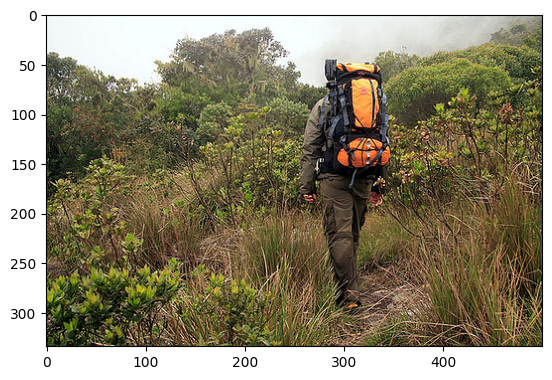

In [140]:
generate_caption(3, unique_valid_img.iloc[112]['image'])